In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
transforms = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize([0.1307], [0.3081])
])

train = torchvision.datasets.MNIST(
    "./data", train=True, download=True, transform=transforms)
test = torchvision.datasets.MNIST(
    "./data", train=False, download=True, transform=transforms)

batch_size = 64
train_ldr = DataLoader(train, batch_size=batch_size,
                       shuffle=True, num_workers=4)
test_ldr = DataLoader(test, batch_size=batch_size, shuffle=True, num_workers=4)


In [3]:
from model import MnistModel

model = MnistModel()
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 5
losses = []
accuracies = []

for epoch in range(epochs):
    print("epoch: {}".format(epoch))
    train_loss = 0
    train_acc = 0
    for batch_idx, (batch, labels) in (pbar := tqdm(enumerate(train_ldr), total=len(train_ldr))):
        batch, labels = batch.to(device), labels.to(device)
        y = model(batch)
        pred = torch.argmax(torch.exp(y), dim=1)
        loss = loss_fn(y, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss.item()
        train_acc += (pred == labels).sum().item() / len(batch)
        pbar.set_description("    loss: {:.3f}; acc: {:.3f}".format(train_loss / (batch_idx + 1), train_acc / (batch_idx + 1)))

    losses.append(train_loss / len(train_ldr))
    accuracies.append(train_acc / len(train_ldr))


epoch: 0


    loss: 0.156; acc: 0.955: 100%|██████████| 938/938 [00:22<00:00, 42.33it/s]


epoch: 1


    loss: 0.076; acc: 0.978: 100%|██████████| 938/938 [00:18<00:00, 49.86it/s]


epoch: 2


    loss: 0.061; acc: 0.984: 100%|██████████| 938/938 [00:17<00:00, 53.19it/s]


epoch: 3


    loss: 0.053; acc: 0.986: 100%|██████████| 938/938 [00:17<00:00, 54.62it/s]


epoch: 4


    loss: 0.049; acc: 0.986: 100%|██████████| 938/938 [00:17<00:00, 55.00it/s]


In [5]:
torch.save(model.state_dict(), './models/mnist.pt')

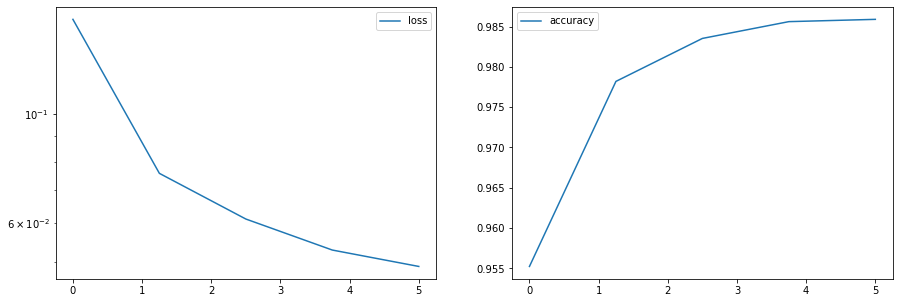

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.set_facecolor('white')
ax1.set_yscale('log')
ax1.plot(np.linspace(0, epochs, num=epochs), losses, label='loss')
ax1.legend()
ax2.plot(np.linspace(0, epochs, num=epochs), accuracies, label='accuracy')
ax2.legend()
